In [15]:
import numpy as np
import matplotlib.pyplot as plt
c = 3*1e8

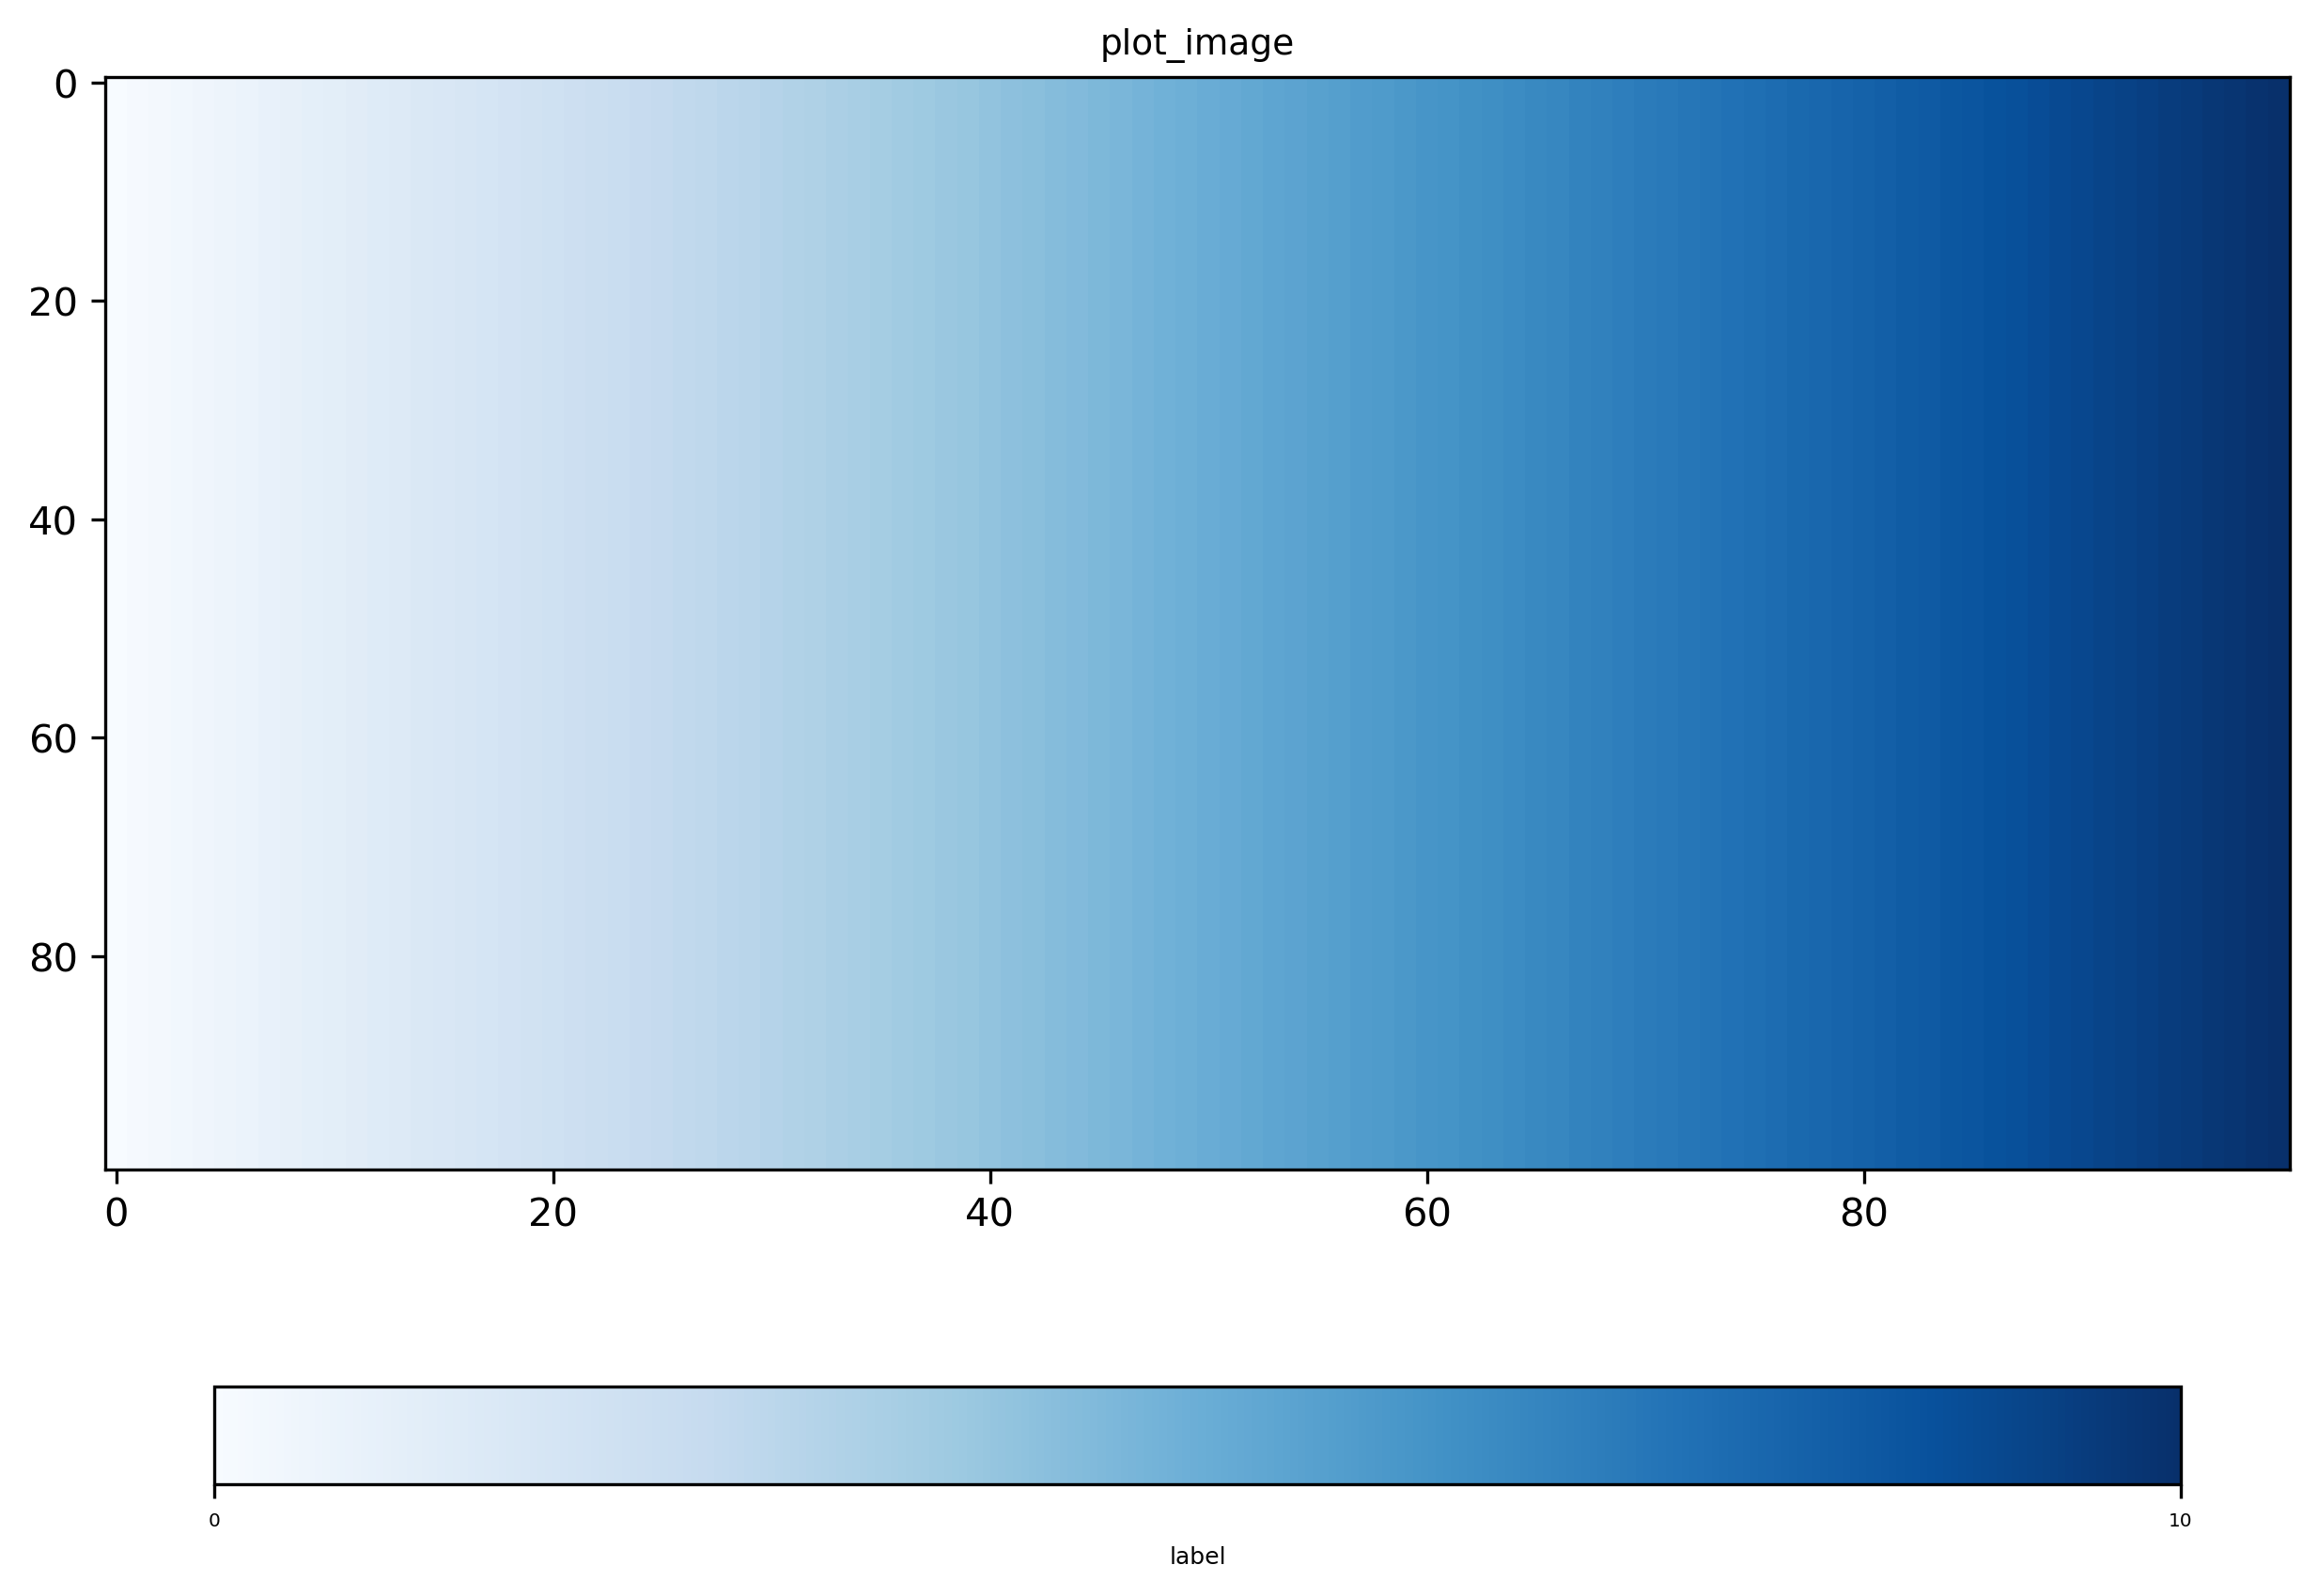

In [2]:
import numpy as np
np.linspace(2.85,3.45,7)

from Functions import *
X = np.linspace(0,10,100).reshape(-1,1)
Y = X
data = np.meshgrid(X,Y)
param_dict = {"aspect":0.5,
              "figsize":(10,10),
              "fontsize":6,
              "cbar_label":"label"}
Plot_im(data[0],**param_dict)

In [16]:
from Functions import *
X = np.linspace(0,10,100).reshape(-1,1)
Y = X
data = np.meshgrid(X,Y)
param_dict = {"aspect":2,
              "fontsize":2,
              "cbar_label":"label"}

In [17]:
param_dict={"xticks":[1,2,3,4,5]}
xticks = np.array(param_dict["xticks"])
xmin=2
xmax=4
xticks_mask = np.where((xticks<xmax) & (xticks>xmin))
xticks[xticks_mask]


array([3])

In [18]:
def Load_uncoupled_data(filename_uncoupled, wavl_arr=[]):
    beta_uncoupled_arr = []
    with open(filename_uncoupled,'r') as f:
        data_uncoupled = f.readlines()
        for line in data_uncoupled[1:]:
            line = np.float64(line.split(","))
            if line[0] < np.min(wavl_arr) or line[0] > np.max(wavl_arr):
                continue
            beta_uncoupled_arr.append(line)
    beta_uncoupled_arr = np.array(beta_uncoupled_arr)
    return beta_uncoupled_arr


In [19]:
from scipy.interpolate import CubicSpline
def Interpolation(self,x,y,x_intp,num_of_pts=100):
    cs = CubicSpline(x, y, bc_type='natural')  # bc_type 可选 'natural', 'clamped', 'periodic' 等
    y_intp = cs(x_intp)
    return y_intp

def Polynomial_fit(x, y_arr, x_fit, order = 1, num_of_fit_pts  = 100):
        num_of_columns  = np.shape(y_arr)[1]
        coeffi_array    = np.zeros((order+1,num_of_columns))
        y_fit_arr       = np.zeros((num_of_fit_pts,num_of_columns))
        for idx in range(num_of_columns):
            y = y_arr[:,idx]
            coefficients = np.polyfit(x, y, order)
            coeffi_array[:,idx] = coefficients
            y_fit = np.polyval(coefficients, x_fit)
            y_fit_arr[:,idx] = y_fit
        return coeffi_array, y_fit_arr

num_of_pts  = 1000
wavl_arr    = np.linspace(1400,1700,30)*1e-3
fre_arr     = 3*1e8 / (wavl_arr)
wavl_arr_intp    =  np.linspace(1400,1700,num_of_pts)*1e-3
fre_arr_intp     = 3*1e8 / (wavl_arr_intp)
filename_uncoupled = "./results/beta/Sheet 1-Table 1.txt"
beta_uncoupled_arr = Load_uncoupled_data(filename_uncoupled, wavl_arr)
beta_uncoupled_arr = beta_uncoupled_arr

beta_uncoupled_arr

array([[1.41000000e+00, 0.00000000e+00, 0.00000000e+00, 6.62923008e+03],
       [1.42000000e+00, 0.00000000e+00, 0.00000000e+00, 6.57847452e+03],
       [1.43000000e+00, 0.00000000e+00, 0.00000000e+00, 6.52849976e+03],
       [1.44000000e+00, 0.00000000e+00, 0.00000000e+00, 6.47928810e+03],
       [1.45000000e+00, 0.00000000e+00, 0.00000000e+00, 6.43082237e+03],
       [1.46000000e+00, 0.00000000e+00, 0.00000000e+00, 6.38307645e+03],
       [1.47000000e+00, 0.00000000e+00, 0.00000000e+00, 6.33603832e+03],
       [1.48000000e+00, 0.00000000e+00, 0.00000000e+00, 6.28966317e+03],
       [1.49000000e+00, 0.00000000e+00, 0.00000000e+00, 6.24397164e+03],
       [1.50000000e+00, 0.00000000e+00, 0.00000000e+00, 6.19894887e+03],
       [1.51000000e+00, 0.00000000e+00, 0.00000000e+00, 6.15457416e+03],
       [1.52000000e+00, 0.00000000e+00, 0.00000000e+00, 6.11083400e+03],
       [1.53000000e+00, 0.00000000e+00, 0.00000000e+00, 6.06771773e+03],
       [1.54000000e+00, 0.00000000e+00, 0.00000000e

In [20]:
coeffi_array, beta_uncoupled_arr_intp = Polynomial_fit(fre_arr,
                                                beta_uncoupled_arr[:,3].reshape(-1,1),
                                                fre_arr_intp,
                                                3, num_of_pts)
coeffi_array


array([[-2.73346290e-23],
       [ 2.29040126e-14],
       [ 2.62250248e-05],
       [ 2.26789635e+02]])

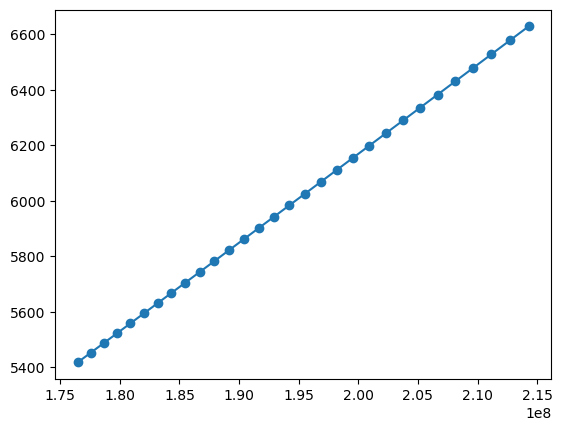

In [21]:
plt.scatter(fre_arr,beta_uncoupled_arr[:,3])
plt.plot(fre_arr_intp,beta_uncoupled_arr_intp)

In [22]:
np.shape(beta_uncoupled_arr)

(30, 4)

In [23]:
def Calculate_dispersion_D(Beta,wavl_arr_):
    wavl_arr    = wavl_arr_ * 1e-6          #unit: m
    omega_arr   = 2*np.pi * c / (wavl_arr)      #unit: rad/s
    Beta_1      = First_derivative_central_diff(Beta, omega_arr)
    Beta_1      = Beta_1 *1e12 * 1e3        # unit: ps/km
    D           = First_derivative_central_diff(Beta_1, wavl_arr[1:-1])
    D           = D * 1e-9                          # unit: ps/km/nm
    # Beta_2      = First_derivative_central_diff(Beta_1, omega_arr[1:-1])
    # Beta_2      = Beta_2 *1e12
    # D           = - 2*np.pi * Data_analyzer.c*1e-3 / (wavl_arr[2:-2]*1e9)**2 * Beta_2
    return D, Beta_1

def First_derivative_central_diff(y,x):
    # 计算差分
    dy = np.diff(y)  # y[i+1] - y[i]
    dx = np.diff(x)  # x[i+1] - x[i]
    # 中心差分
    dy_central = (y[2:] - y[:-2])  # y[i+1] - y[i-1]
    dx_central = (x[2:] - x[:-2])  # x[i+1] - x[i-1]
    # 计算导数
    derivative = dy_central / dx_central
    return derivative


D_WG1, Beta_1_WG1 = Calculate_dispersion_D(beta_uncoupled_arr_intp.reshape((num_of_pts,),) / 1e-3, wavl_arr_intp)

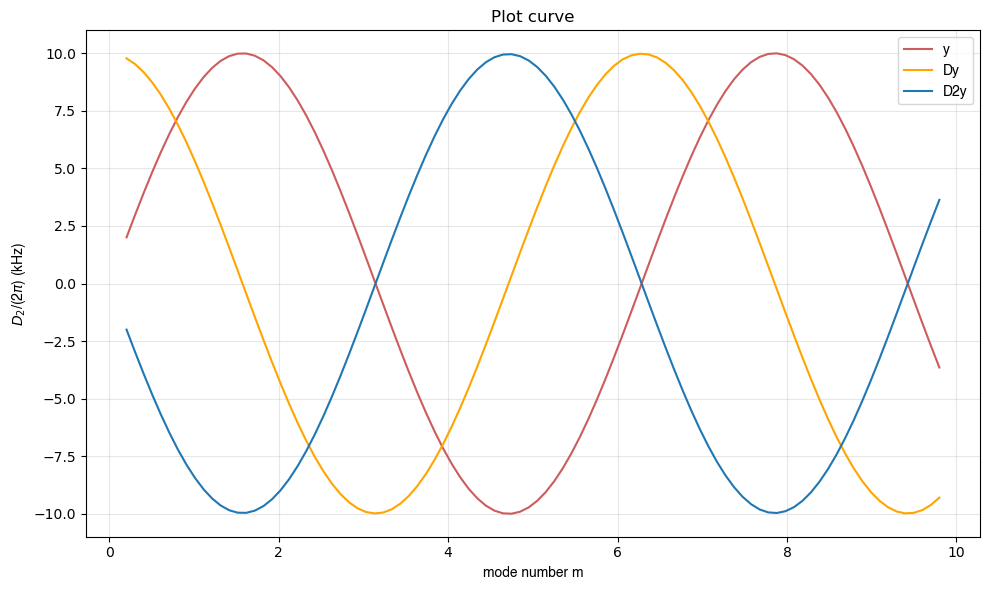

In [24]:
x = np.linspace(0,10,100)
y = 10*np.sin(x)
Dy = First_derivative_central_diff(y,x)
D2y = First_derivative_central_diff(Dy,x[1:-1])

data_arr        = (np.c_[x[2:-2],y[2:-2],Dy[1:-1],D2y],)

data_label_arr  = [r"y", r"Dy","D2y"]*3
color_list      = ['indianred']+['Orange']+['tab:blue']+['tab:green']*2+['black']*10
linestyle_list  = ["-"]*10

param_dict   = {"Y_legends"     : data_label_arr,
                "X_label"       :'mode number m',
                "Y_label"       : r"$D_2$/(2$\pi$) (kHz)",
                # "title"         : "Dispersion of Mode number non-conservation coupling",
                # "figsize"       : (8,6),
                "marker_list"   : [""]*15,
                "linestyle_list": linestyle_list,
                "colors_list"   : color_list,
}
Plot_curve(data_arr,**param_dict)

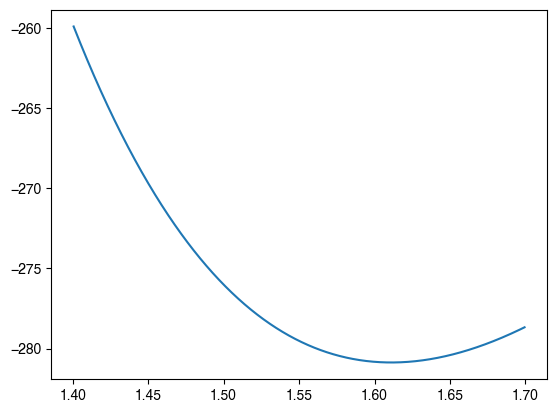

In [25]:
plt.plot(wavl_arr_intp[2:-2],D_WG1)

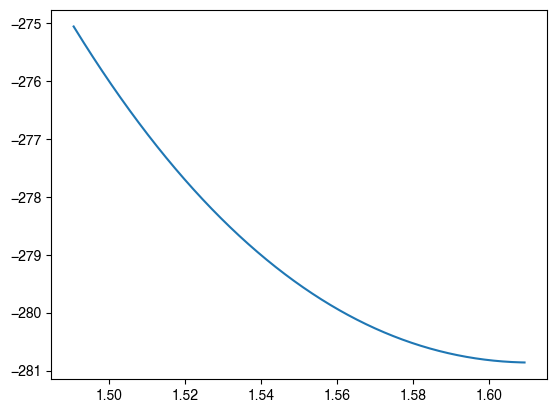

In [26]:
plt.plot(wavl_arr_intp[2+300:-2-300],D_WG1[300:-300])

In [27]:
c= 3*1e8
def Load_isolated_dispersion_Lumerical(filename_FDE):
    D_lumerical_arr = []
    with open(filename_FDE,'r') as f:
        data_lumerical = f.readlines()
        for line in data_lumerical[1:]:
            fre         = float(line.split('\t')[0].strip())          #unit: Hz
            D           = float(line.split('\t')[1].strip()) * 1e6      # unit: ps/km/nm
            wavl   = c/fre * 1e6                       # unit: um
            D_lumerical_arr.append([wavl,D])
    return D_lumerical_arr

In [28]:
filename_FDE="../data/Dispersion_of_isolated_inner_ring.txt"
D_iso_arr = np.flip(np.array(Load_isolated_dispersion_Lumerical(filename_FDE)),axis=0)


In [29]:
filename_FDE="../data/gapx_2.3um.txt"
D_2D_concentric =  np.flip(np.array(Load_isolated_dispersion_Lumerical(filename_FDE)),axis=0)


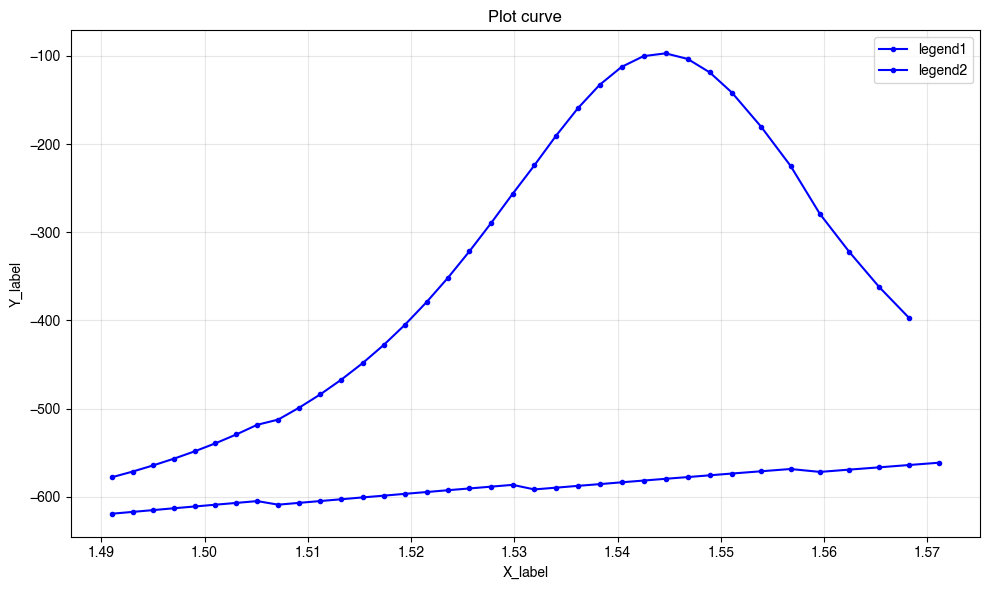

In [30]:
data_arr = (D_iso_arr,D_2D_concentric)
Plot_curve(data_arr)